# Chromatic Numbers
In this notebook, we calculate the chromatic number $\chi(G)$ for a graph $G$ as part of Section 3.1 by determining ideal membership.

In [1]:
from sympy import *
import networkx as nx

In [2]:
# generate random graph (Erdos-Renyi graph)
G = nx.fast_gnp_random_graph(5,0.6)

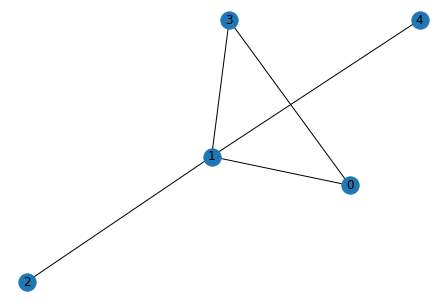

In [3]:
nx.draw(G, with_labels=True)

In [4]:
# initialise variables to solve for and gets edge pairs
var('x')
vertices = [Symbol('x' + str(i)) for i in list(G.nodes)]
edges = [(vertices[i], vertices[j]) for i, j in list(G.edges)]

In [5]:
# initialises generators of cover ideal for the given graph
cover_ideal = QQ.old_poly_ring(Symbol('x0'), Symbol('x1'), Symbol('x2'), Symbol('x3'), Symbol('x4')).ideal(1)
for u,v in edges:
    ideal = QQ.old_poly_ring(Symbol('x0'), Symbol('x1'), Symbol('x2'), Symbol('x3'), Symbol('x4')).ideal(u,v)
    cover_ideal = cover_ideal.intersect(ideal)
cover_ideal

<x0*x2*x3*x4,-x0*x1,-x1*x3>

In [6]:
j = cover_ideal
for i in range(1,100000):
    if j.contains((Symbol('x0')*Symbol('x1')*Symbol('x2')*Symbol('x3')*Symbol('x4'))**(i-1)):
        print("Chromatic number of G is " + str(i))
        break
    j = j.product(cover_ideal)

Chromatic number of G is 3
